# Analyzing Police Activity with pandas

## Preparing the data
* Examine the data 
* Clean the data

In [1]:
import pandas as pd

In [2]:
ri = pd.read_csv('police.csv')
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


## Locating missing values

In [3]:
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

## Dropping a column

In [4]:
ri.shape

(91741, 15)

* We can see the country_name column is all null, drop it

In [5]:
ri.drop('county_name', axis='columns', inplace=True)

In [6]:
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

## Drop rows

In [7]:
ri.head()

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [8]:
ri.dropna(subset=['stop_date','stop_time'], inplace=True)

## Data Type

In [9]:
ri.dtypes

state                 object
stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

## Fixing a data type
We saw in the previous exercise that the is_arrested column currently has the object data type. In this exercise, we'll change the data type to bool, which is the most suitable type for a column containing True and False values.

Fixing the data type will enable us to use mathematical operations on the is_arrested column that would not be possible otherwise.

* Examine the head of the is_arrested column to verify that it contains True and False values.
* Check the current data type of is_arrested.
* Use the .astype() method to convert is_arrested to a bool column.
* Check the new data type of is_arrested, to confirm that it is now a bool column.


In [10]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())

# Check the data type of 'is_arrested'
print(ri.is_arrested.dtype)

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

# Check the data type of 'is_arrested' (again)
print(ri.is_arrested.dtype)

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object
object
bool


## Creating a DatetimeIndex

In [11]:
ri.head()

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [12]:
ri.dtypes

state                 object
stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested             bool
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

To do:
* To combine the stop_date and stop_time into one column
* To convert to pandas datetime type

## Combining object columns
Currently, the date and time of each traffic stop are stored in separate object columns: stop_date and stop_time.

In this exercise, you'll combine these two columns into a single column, and then convert it to datetime format. This will enable convenient date-based attributes that we'll use later in the course.


* Use a string method to concatenate stop_date and stop_time (separated by a space), and store the result in combined.
* Convert combined to datetime format, and store the result in a new column named stop_datetime.
* Examine the DataFrame .dtypes to confirm that stop_datetime is a datetime column.

In [13]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.stop_datetime.dtypes)

datetime64[ns]


## Setting the index
The last step that you'll take in this chapter is to set the stop_datetime column as the DataFrame's index. By replacing the default index with a DatetimeIndex, you'll make it easier to analyze the dataset by date and time, which will come in handy later in the course!

* Set stop_datetime as the DataFrame index.
* Examine the index to verify that it is a DatetimeIndex.
* Examine the DataFrame columns to confirm that stop_datetime is no longer one of the columns.

In [14]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name=u'stop_datetime', length=91741, freq=None)
Index([u'state', u'stop_date', u'stop_time', u'driver_gender', u'driver_race',
       u'violation_raw', u'violation', u'search_conducted', u'search_type',
       u'stop_outcome', u'is_arrested', u'stop_duration',
       u'drugs_related_stop', u'district'],
      dtype='object')


# Chapter 2

## Count unique values

In [15]:
# value_counts(): best suit for count categorical data
ri.stop_outcome.value_counts()

Citation            77092
Warning              5137
Arrest Driver        2735
No Action             625
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

In [16]:
ri.stop_outcome.value_counts().sum()

86539

In [17]:
ri.shape

(91741, 14)

In [18]:
# output %
ri.stop_outcome.value_counts(normalize=True)

Citation            0.890835
Warning             0.059361
Arrest Driver       0.031604
No Action           0.007222
N/D                 0.007014
Arrest Passenger    0.003964
Name: stop_outcome, dtype: float64

In [19]:
warn = ri[ri.stop_outcome == 'Warning']
warn.shape

(5137, 14)

In [20]:
# Count the unique values in 'violation'
print(ri.violation.value_counts())

# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

Speeding               48424
Moving violation       16224
Equipment              10922
Other                   4410
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64
Speeding               0.559563
Moving violation       0.187476
Equipment              0.126209
Other                  0.050960
Registration/plates    0.042790
Seat belt              0.033002
Name: violation, dtype: float64


## Comparing violations by gender
The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.

In this exercise, you'll first create a DataFrame for each gender, and then analyze the violations in each DataFrame separately.

In [21]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender == 'F']

# Create a DataFrame of male drivers
male = ri[ri.driver_gender == 'M']

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64
Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


In [22]:
female.shape

(23774, 14)

In [23]:
female_and_arrested = ri[(ri.driver_gender == 'F') & (ri.is_arrested == True)]

In [24]:
female_and_arrested.shape

(669, 14)

## Comparing speeding outcomes by gender
When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can you find evidence of this in the dataset?

First, you'll create two DataFrames of drivers who were stopped for speeding: one containing females and the other containing males.

Then, for each gender, you'll use the stop_outcome column to calculate what percentage of stops resulted in a "Citation" (meaning a ticket) versus a "Warning".

* Create a DataFrame, female_and_speeding, that only includes female drivers who were stopped for speeding.
* Create a DataFrame, male_and_speeding, that only includes male drivers who were stopped for speeding.
* Count the stop outcomes for the female drivers and express them as proportions.
* Count the stop outcomes for the male drivers and express them as proportions.

In [25]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64
Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


## Taking the mean of a boolean series 

In [26]:
ri.is_arrested.value_counts(normalize=True)

False    0.909746
True     0.090254
Name: is_arrested, dtype: float64

In [27]:
ri.is_arrested.dtype

dtype('bool')

In [28]:
ri.is_arrested.mean()

0.09025408486936048

## Comparing groups using groupby

In [29]:
ri.district.unique()

array(['Zone X4', 'Zone K3', 'Zone X1', 'Zone X3', 'Zone K1', 'Zone K2'],
      dtype=object)

In [30]:
ri.groupby('district').is_arrested.mean()

district
Zone K1    0.067181
Zone K2    0.069522
Zone K3    0.072286
Zone X1    0.230044
Zone X3    0.082466
Zone X4    0.117674
Name: is_arrested, dtype: float64

In [31]:
ri.groupby(['district','driver_gender']).is_arrested.mean()

district  driver_gender
Zone K1   F                0.019169
          M                0.026588
Zone K2   F                0.022196
          M                0.034285
Zone K3   F                0.025156
          M                0.034961
Zone X1   F                0.019646
          M                0.024563
Zone X3   F                0.027188
          M                0.038166
Zone X4   F                0.042149
          M                0.049956
Name: is_arrested, dtype: float64

## Does gender affect who is frisked during a search?

In [32]:
ri.search_conducted.value_counts()

False    88434
True      3307
Name: search_conducted, dtype: int64

In [33]:
ri.search_type.value_counts(dropna=False)

NaN                                                         88434
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Incident to Arrest,Inventory,Probable Cause                    35
Probable Cause,Protective Frisk                                35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

In [34]:
ri.search_type.value_counts()

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [35]:
ri['inventory'] = ri.search_type.str.contains('Inventory', na=False)
# na = False return a False when it finds a missing value

In [36]:
ri.inventory.dtype

dtype('bool')

In [37]:
ri.inventory.sum()

441

In [38]:
searched = ri[ri.search_conducted == True]
searched.inventory.mean()

0.13335349259147264

In [39]:
# 13.3% of searches included an inventory

## Counting protective frisks
During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."

In this exercise, you'll first check to see how many times "Protective Frisk" was the only search type. Then, you'll use a string method to locate all instances in which the driver was frisked.

* Count the search_type values to see how many times "Protective Frisk" was the only search type.
* Create a new column, frisk, that is True if search_type contains the string "Protective Frisk" and False otherwise.
* Check the data type of frisk to confirm that it's a Boolean Series.
* Take the sum of frisk to count the total number of frisks.

In [40]:
# Count the 'search_type' values
print(ri.search_type.value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri.frisk.dtype)

# Take the sum of 'frisk'
print(ri.frisk.sum())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

## Comparing frisk rates by gender
In this exercise, you'll compare the rates at which female and male drivers are frisked during a search. Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

Before doing any calculations, it's important to filter the DataFrame to only include the relevant subset of data, namely stops in which a search was conducted.


* Create a DataFrame, searched, that only contains rows in which search_conducted is True.
* Take the mean of the frisk column to find out what percentage of searches included a frisk.
* Calculate the frisk rate for each gender using a .groupby().

In [41]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted==True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.09162382824312065
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


## Calculating the hourly arrest rate
When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops. Then, you'll calculate the hourly arrest rate by using the hour attribute of the index. The hour ranges from 0 to 23, in which:

* 0 = midnight
* 12 = noon
* 23 = 11 PM

===================

* Take the mean of the is_arrested column to calculate the overall arrest rate.
* Group by the hour attribute of the DataFrame index to calculate the hourly arrest rate.
* Save the hourly arrest rate Series as a new object, hourly_arrest_rate.

In [42]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.09025408486936048
stop_datetime
0     0.121206
1     0.144250
2     0.144120
3     0.148370
4     0.179310
5     0.178899
6     0.043614
7     0.053497
8     0.073591
9     0.070199
10    0.069306
11    0.075217
12    0.087040
13    0.078964
14    0.080171
15    0.080526
16    0.089505
17    0.107914
18    0.089883
19    0.078508
20    0.091482
21    0.153265
22    0.110715
23    0.108225
Name: is_arrested, dtype: float64


## Plotting the hourly arrest rate
In this exercise, you'll create a line plot from the hourly_arrest_rate object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

* Import matplotlib.pyplot using the alias plt.
* Create a line plot of hourly_arrest_rate using the .plot() method.
* Label the x-axis as 'Hour', label the y-axis as 'Arrest Rate', and title the plot 'Arrest Rate by Time of Day'.
* Display the plot using the .show() function.

In [43]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

<Figure size 640x480 with 1 Axes>

## Plotting drug-related stops
In a small portion of traffic stops, drugs are found in the vehicle during a search. In this exercise, you'll assess whether these drug-related stops are becoming more common over time.

The Boolean column drugs_related_stop indicates whether drugs were found during a given stop. You'll calculate the annual drug rate by resampling this column, and then you'll use a line plot to visualize how the rate has changed over time.


* Calculate the annual rate of drug-related stops by resampling the drugs_related_stop column (on the 'A' frequency) and taking the mean.
* Save the annual drug rate Series as a new object, annual_drug_rate.
* Create a line plot of annual_drug_rate using the .plot() method.
* Display the plot using the .show() function.

stop_datetime
2005-12-31    0.006390
2006-12-31    0.006913
2007-12-31    0.007520
2008-12-31    0.006998
2009-12-31    0.009079
2010-12-31    0.009407
2011-12-31    0.009035
2012-12-31    0.009388
2013-12-31    0.012283
2014-12-31    0.013280
2015-12-31    0.011787
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


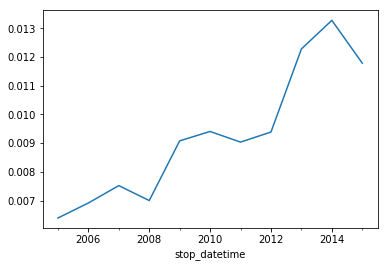

In [44]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

## Comparing drug and search rates
As you saw in the last exercise, the rate of drug-related stops increased significantly between 2005 and 2015. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

* Calculate the annual search rate by resampling the search_conducted column, and save the result as annual_search_rate.
* Concatenate annual_drug_rate and annual_search_rate along the columns axis, and save the result as annual.
* Create subplots of the drug and search rates from the annual DataFrame.
* Display the subplots.

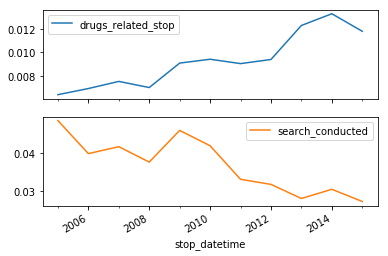

In [45]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

## Tallying violations by district
The state of Rhode Island is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the "K" zones, which you'll examine further in the next exercise.


* Create a frequency table from the district and violation columns using the pd.crosstab() function.
* Save the frequency table as a new object, all_zones.
* Select rows 'Zone K1' through 'Zone K3' from all_zones using the .loc[] accessor.
* Save the smaller table as a new object, k_zones.


In [46]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          673              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    706                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12323  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

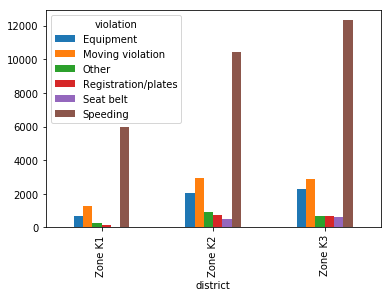

In [47]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

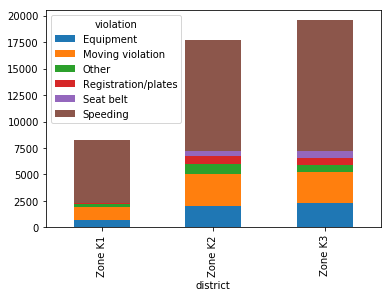

In [48]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar',stacked=True)

# Display the plot
plt.show()

## Converting stop durations to numbers
In the traffic stops dataset, the stop_duration column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as '0-15 Min'. How can you make this data easier to analyze?

In this exercise, you'll convert the stop durations to integers. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

* Convert '0-15 Min' to 8
* Convert '16-30 Min' to 23
* Convert '30+ Min' to 45

====
* Print the unique values in the stop_duration column. (This has been done for you.)
* Create a dictionary called mapping that maps the stop_duration strings to the integers specified above.
* Convert the stop_duration strings to integers using the mapping, and store the results in a new column called stop_minutes.
* Print the unique values in the stop_minutes column, to verify that the durations were properly converted to integers.

In [49]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8,'16-30 Min':23,'30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' nan '30+ Min']
[ 8. 23. nan 45.]


## Plotting stop length
If you were stopped for a particular violation, how long might you expect to be detained?

In this exercise, you'll visualize the average length of time drivers are stopped for each type of violation. Rather than using the violation column in this exercise, you'll use violation_raw since it contains more detailed descriptions of the violations.


* For each value in the violation_raw column, calculate the mean number of stop_minutes that a driver is detained.
* Save the resulting Series as a new object, stop_length.
* Sort stop_length by its values, and then visualize it using a horizontal bar plot.
* Display the plot.

violation_raw
APB                                 17.967033
Call for Service                    22.140805
Equipment/Inspection Violation      11.445340
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581509
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


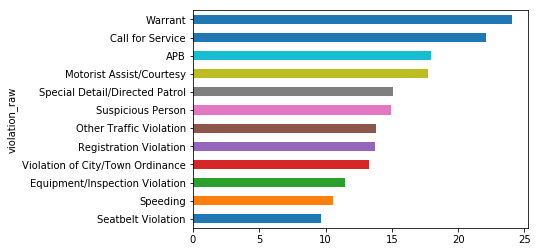

In [50]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()

# Exploring the weather dataset

In [51]:
weather = pd.read_csv('weather.csv')
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [52]:
weather[['AWND','WSF2']].head()

,AWND,WSF2
0,8.95,25.1
1,9.40,14.1
2,6.93,17.0
3,6.93,16.1
4,7.83,17.0


In [53]:
weather[['AWND','WSF2']].describe()

,AWND,WSF2
count,4017.000000,4017.000000
mean,8.593707,19.274782
std,3.364601,5.623866
min,0.220000,4.900000
25%,6.260000,15.000000
50%,8.050000,17.900000
75%,10.290000,21.900000
max,26.840000,48.100000


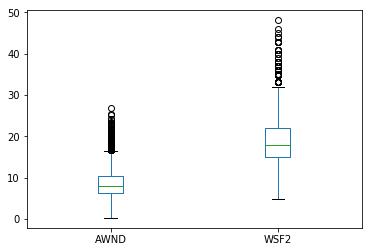

In [54]:
weather[['AWND','WSF2']].plot(kind='box')
plt.show()

## Creating a histogram 

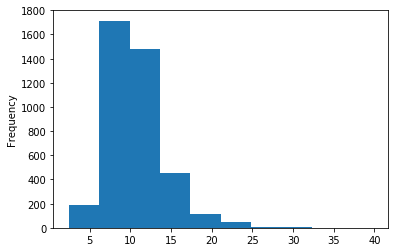

In [55]:
weather['WDIFF'] = weather.WSF2 - weather.AWND
weather.WDIFF.plot(kind='hist')
plt.show()

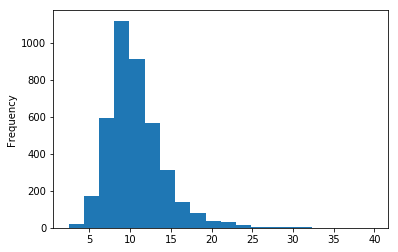

In [56]:
weather.WDIFF.plot(kind='hist', bins=20)
plt.show()

## Categorizing the weather

In [57]:
weather.shape

(4017, 28)

In [58]:
weather.columns

Index([u'STATION', u'DATE', u'TAVG', u'TMIN', u'TMAX', u'AWND', u'WSF2',
       u'WT01', u'WT02', u'WT03', u'WT04', u'WT05', u'WT06', u'WT07', u'WT08',
       u'WT09', u'WT10', u'WT11', u'WT13', u'WT14', u'WT15', u'WT16', u'WT17',
       u'WT18', u'WT19', u'WT21', u'WT22', u'WDIFF'],
      dtype='object')

In [59]:
# selecting a slice of the dataframe
temp = weather.loc[:, 'TAVG':'TMAX']   # all rows and columns tavg~tmax

In [60]:
temp.shape

(4017, 3)

In [61]:
temp.columns

Index([u'TAVG', u'TMIN', u'TMAX'], dtype='object')

In [62]:
temp.head()

,TAVG,TMIN,TMAX
0,44.0,35,53
1,36.0,28,44
2,49.0,44,53
3,42.0,39,45
4,36.0,28,43


In [63]:
temp.sum()

TAVG     63884.0
TMIN    174677.0
TMAX    246116.0
dtype: float64

In [64]:
# pandas to calculate the row sums. Combine 'columns' for each row
temp.sum(axis='columns').head()

0    132.0
1    108.0
2    146.0
3    126.0
4    107.0
dtype: float64

In [65]:
ri.stop_duration.fillna('NAN',inplace=True)
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', 'NAN', '30+ Min'], dtype=object)

In [66]:
mapping = {'0-15 Min':'short', 'NAN':'short','16-30 Min':'medium', '30+ Min':'long'}

In [67]:
ri['stop_length'] = ri.stop_duration.map(mapping)

In [68]:
ri.stop_length.dtype

dtype('O')

In [69]:
ri.stop_length.unique()

array(['short', 'medium', 'long'], dtype=object)

In [70]:
ri.stop_length.memory_usage(deep=True)

7952938

In [71]:
cats = ['short', 'medium', 'long']
ri['stop_length'] = ri.stop_length.astype('category', ordered=True, categories=cats)

/usr/local/lib/python2.7.12/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


In [72]:
ri.stop_length.memory_usage(deep=True)

3447339

In [73]:
ri.stop_length.head()

stop_datetime
2005-01-04 12:55:00     short
2005-01-23 23:15:00     short
2005-02-17 04:15:00     short
2005-02-20 17:15:00    medium
2005-02-24 01:20:00     short
Name: stop_length, dtype: category
Categories (3, object): [short < medium < long]

In [74]:
ri[ri.stop_length > 'short'].shape

(16960, 18)

In [75]:
ri.groupby('stop_length').is_arrested.mean()

stop_length
short     0.082267
medium    0.093595
long      0.261491
Name: is_arrested, dtype: float64

## Counting bad weather conditions
The weather DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For example:

* WT05 indicates "Hail"
* WT11 indicates "High or damaging winds"
* WT17 indicates "Freezing rain"

===
For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present).

In this exercise, you'll quantify "how bad" the weather was each day by counting the number of 1 values in each row.

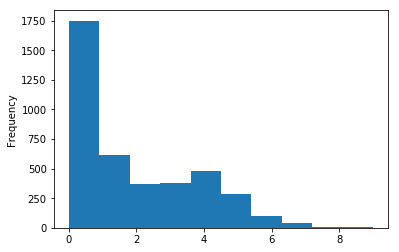

In [76]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:,'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

# Display the plot
plt.show()

## Rating the weather conditions

In [77]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad',  2:'bad',3:'bad',4:'bad',5:'worse',6:'worse',7:'worse',8:'worse',9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

# Create a list of weather ratings in logical order
cats = ['good','bad','worse']

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype('category',ordered=True, categories=cats)

# Examine the head of 'rating'
print(weather.rating.head())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64
0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]


/usr/local/lib/python2.7.12/lib/python2.7/site-packages/ipykernel_launcher.py:17: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead


# Merge
## Preparing the DataFrames
In this exercise, you'll prepare the traffic stop and weather rating DataFrames so that they're ready to be merged:

With the ri DataFrame, you'll move the stop_datetime index to a column since the index will be lost during the merge.
With the weather DataFrame, you'll select the DATE and rating columns and put them in a new DataFrame.


* Reset the index of the ri DataFrame.
* Examine the head of ri to verify that stop_datetime is now a DataFrame column, and the index is now the default integer index.
* Create a new DataFrame named weather_rating that contains only the DATE and rating columns from the weather DataFrame.
* Examine the head of weather_rating to verify that it contains the proper columns.

In [78]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating=weather[['DATE','rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

        stop_datetime state   stop_date stop_time driver_gender driver_race  \
0 2005-01-04 12:55:00    RI  2005-01-04     12:55             M       White   
1 2005-01-23 23:15:00    RI  2005-01-23     23:15             M       White   
2 2005-02-17 04:15:00    RI  2005-02-17     04:15             M       White   
3 2005-02-20 17:15:00    RI  2005-02-20     17:15             M       White   
4 2005-02-24 01:20:00    RI  2005-02-24     01:20             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome  is_arrested stop_duration  drugs_relat

## Merging the DataFrames
In this exercise, you'll merge the ri and weather_rating DataFrames into a new DataFrame, ri_weather.

The DataFrames will be joined using the stop_date column from ri and the DATE column from weather_rating. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set stop_datetime as the index, which is the column you saved in the previous exercise.

In [79]:
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

(91741, 19)
(91741, 21)


# Does weather affect the arrest rate?

In [80]:
ri.groupby(['violation','driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

* The result disproved our hypothesis, because the search rate is higher for males than for females across all violations.

In [81]:
search_rate = ri.groupby(['violation','driver_gender']).search_conducted.mean()
search_rate

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

In [82]:
type(search_rate)

pandas.core.series.Series

In [83]:
type(search_rate.index)

pandas.core.indexes.multi.MultiIndex

## Working with a multi-indexed series

In [84]:
# is like the treatment of a pandas dataframe

search_rate.loc['Equipment']

driver_gender
F    0.039984
M    0.071496
Name: search_conducted, dtype: float64

In [85]:
search_rate.loc['Equipment','M']

0.07149643705463182

In [86]:
# use unstack to convert to a data frame
search_rate.unstack()

driver_gender,F,M
violation,,
Equipment,0.039984,0.071496
Moving violation,0.039257,0.061524
Other,0.041018,0.046191
Registration/plates,0.054924,0.108802
Seat belt,0.017301,0.035119
Speeding,0.008309,0.027885


# Pivot table

In [87]:
ri.pivot_table(index='violation', columns='driver_gender', values='search_conducted')

driver_gender,F,M
violation,,
Equipment,0.039984,0.071496
Moving violation,0.039257,0.061524
Other,0.041018,0.046191
Registration/plates,0.054924,0.108802
Seat belt,0.017301,0.035119
Speeding,0.008309,0.027885
